In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
import matplotlib
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

In [2]:
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# matplotlib.style.use('ggplot')
%matplotlib inline
sns.set_style('dark')

In [5]:
news = pd.read_csv("C:/Users/nikhi/OneDrive/Desktop/Py-Practice/Datasets/fake.csv")
news.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


## Analysing the Dataset

In [6]:
print("Types and counts of stories",news.groupby(['type']).size())

Types and counts of stories type
bias            443
bs            11492
conspiracy      430
fake             19
hate            246
junksci         102
satire          146
state           121
dtype: int64


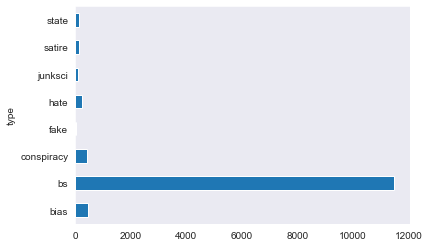

In [7]:
news.groupby(['type']).size().plot(kind = 'barh')

In [8]:
fake_news = news[news['type'] == 'fake']

In [9]:
#Fill any blank feilds
fake_news.title.fillna(" ", inplace = True)
fake_news.text.fillna(" ",inplace = True)

#Join the title and text
all_text = fake_news.title.str.cat(fake_news.text,sep=' ')

#Tokenize
words = nltk.word_tokenize(' '.join(all_text.tolist()))

In [10]:
fake_news.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
57,8a35883f9c9f0b15a9e20ab8711d403d91d57405,0,Jimmy Rustling,2016-10-27T13:00:00.000+03:00,The Amish In America Commit Their Vote To Dona...,18 SHARE The Amish in America have committed t...,english,2016-10-27T15:50:22.818+03:00,abcnews.com.co,CO,65078.0,The Amish In America Commit Their Vote To Dona...,0.000,http://abcnews.com.co/wp-content/uploads/2016/...,0,0,0,0,0,fake
58,c6fb8dae30e3d378935e910540a0cb99b5351ac0,0,Jimmy Rustling,2016-11-11T12:00:00.000+02:00,Obama Signs Executive Order Declaring Investig...,64 SHARE President Obama has signed an Executi...,english,2016-11-11T16:33:32.484+02:00,abcnews.com.co,US,65078.0,Obama Signs Executive Order Declaring Investig...,0.009,http://abcnews.com.co/wp-content/uploads/2016/...,0,0,0,0,0,fake
379,504e8fa4469d75f8d22984220568e3313c74a1b7,0,"Day of the Dead 2015: History, food and reflec...",2016-10-27T05:18:00.000+03:00,Comment on HALLOWEEN IN THE CASTRO RETURNS IN ...,"adobochron 10 Comments \nSan Francisco, Califo...",english,2016-10-27T07:25:28.782+03:00,adobochronicles.com,US,NaN,Comment on HALLOWEEN IN THE CASTRO RETURNS IN ...,0.000,https://adobochroniclesdotcom.files.wordpress....,0,1,0,0,0,fake
380,20e1a45f760f8db5f26207bbfe827bf8cd6d65bb,0,Ivan Jose,2016-10-27T09:18:46.193+03:00,Comment on Tutorial: Riding The Philippine Jee...,"adobochron 1 Comment \nMANILA, Philippines (Th...",english,2016-10-27T09:18:46.193+03:00,adobochronicles.com,US,NaN,Comment on Tutorial: Riding The Philippine Jee...,0.000,https://adobochroniclesdotcom.files.wordpress....,0,1,0,0,0,fake
381,9874fcff14d4af3c13954116c55590b28a5b98b8,0,Tony Rabon,2016-10-28T19:56:09.149+03:00,Comment on What White House Executive Chef Com...,"adobochron 1 Comment Comerford \nWASHINGTON, D...",english,2016-10-28T19:56:09.149+03:00,adobochronicles.com,US,NaN,Comment on What White House Executive Chef Com...,0.000,https://adobochroniclesdotcom.files.wordpress....,0,1,0,0,0,fake


#### WordCloud

In [11]:
#Stopwords
stop = stopwords.words('english') 
cleanwords = [i for i in words if i not in stop and i.isalpha() and len(i) > 2]

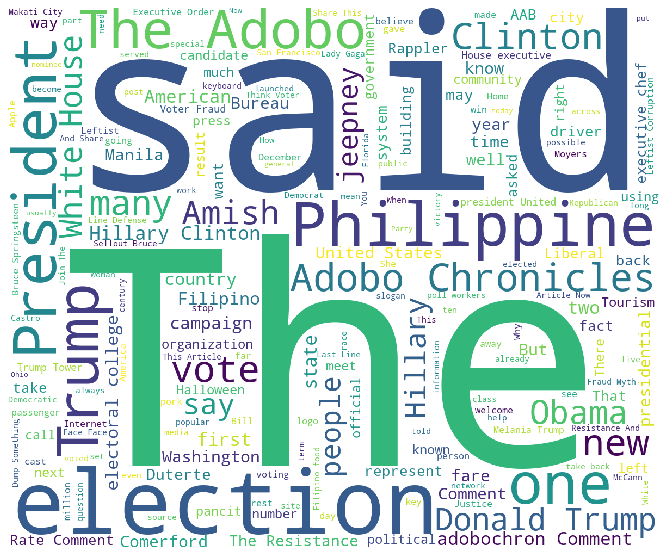

In [12]:
plt.figure(figsize = (12,10))
wordcloud2 = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000,
                         ).generate(" ".join(cleanwords))


plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

#### Bigrams ( Frequency of Words)

In [13]:
bigrams = nltk.bigrams(cleanwords)

In [14]:
#looking at the most common words
counter = Counter(bigrams)
print(counter.most_common(10))

[(('The', 'Adobo'), 20), (('Adobo', 'Chronicles'), 20), (('Donald', 'Trump'), 16), (('White', 'House'), 15), (('Hillary', 'Clinton'), 13), (('electoral', 'college'), 10), (('United', 'States'), 9), (('The', 'Resistance'), 8), (('Rate', 'Comment'), 7), (('adobochron', 'Comment'), 6)]


##### Plotting the Bigrams

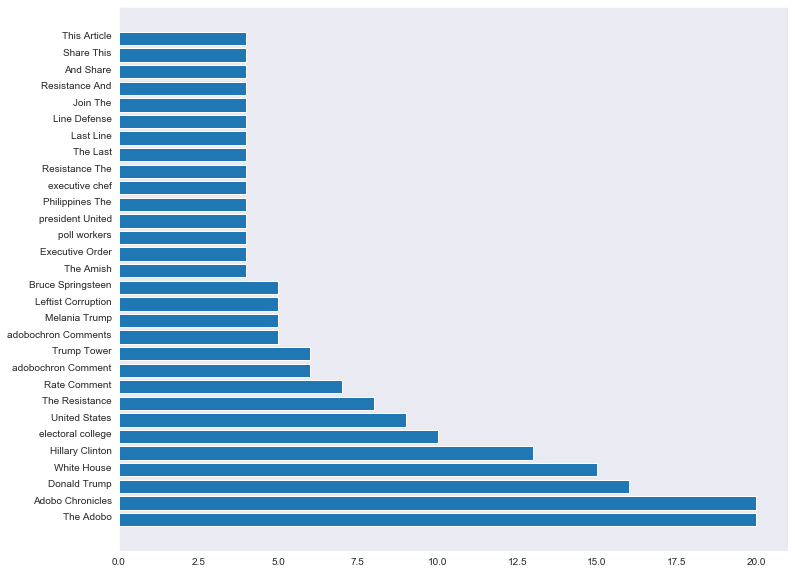

In [15]:
plt.figure(figsize=(12,10))
num_to_show = 30

labels = [' '.join(e[0]) for e in 
          counter.most_common(num_to_show)]
values = [e[1] for e in 
          counter.most_common(num_to_show)]
indexes = np.arange(len(labels))
width = 0.8

plt.barh(indexes, values, width)
plt.yticks(indexes + width * 0.2, labels)
plt.show()

## Machine Learning 

#### Preprocessing the Data

In [16]:
train, test = train_test_split(news, test_size = 0.2)

train_en = train[train["language"]=="english"]
test_en = test[test["language"]=="english"]

In [17]:
def refineWords(s):
    letters_only = re.sub("[^a-zA-Z]"," ",s)
    words = letters_only.lower().split()
    stops = set(stopwords.words('english'))
    meaningful_words = [w for w in words if not w in stops]
    return(" ".join(meaningful_words))

#### Transforming the columns to fit the model

In [18]:
#Train-Set
train_en['text'].fillna(" ",inplace = True)
train_en['text'] = train_en['text'].apply(refineWords)

train_en['author'].fillna(" ",inplace = True)
train_en['author'] = train_en['author'].apply(refineWords)

train_en['site_url'].fillna(" ",inplace = True)
train_en['site_url'] = train_en['site_url'].apply(refineWords)

train_en['title'].fillna(" ",inplace = True)
train_en['title'] = train_en['title'].apply(refineWords)

train_en['thread_title'].fillna(" ",inplace = True)
train_en['thread_title'] = train_en['thread_title'].apply(refineWords)

#Test-Set
test_en["text"].fillna(" ",inplace=True)    
test_en["text"] = test_en["text"].apply(refineWords)

test_en["author"].fillna(" ",inplace=True)    
test_en["author"] = test_en["author"].apply(refineWords)

test_en["site_url"].fillna(" ",inplace=True)    
test_en["site_url"] = test_en["site_url"].apply(refineWords)

test_en["title"].fillna(" ",inplace=True)    
test_en["title"] = test_en["title"].apply(refineWords)

test_en["thread_title"].fillna(" ",inplace=True)    
test_en["thread_title"] = test_en["thread_title"].apply(refineWords)

#print(train_en.head())

#### Vectorizing the Columns

In [19]:
vectorizer = CountVectorizer(analyzer= "word",
                             tokenizer= None,
                             preprocessor= None,
                             stop_words= None,
                             max_features= 5000)
#Train-set
train_en['text'] = vectorizer.fit_transform(train_en['text']).toarray()
train_en['author'] = vectorizer.fit_transform(train_en['author']).toarray()
train_en['site_url'] = vectorizer.fit_transform(train_en['site_url']).toarray()
train_en['title'] = vectorizer.fit_transform(train_en['title']).toarray()
train_en['thread_title'] = vectorizer.fit_transform(train_en['thread_title']).toarray()

#Test-set
test_en["text"] = vectorizer.fit_transform(test_en["text"]).toarray()
test_en["author"] = vectorizer.fit_transform(test_en["author"]).toarray()
test_en["site_url"] = vectorizer.fit_transform(test_en["site_url"]).toarray()
test_en["title"] = vectorizer.fit_transform(test_en["title"]).toarray()
test_en["thread_title"] = vectorizer.fit_transform(test_en["thread_title"]).toarray()

In [20]:
#filling na values in domain_rank
train_en['domain_rank'].fillna(train_en.domain_rank.median(axis = 0), inplace = True)
test_en['domain_rank'].fillna(test_en.domain_rank.median(axis = 0), inplace = True)

In [21]:
train_en['isSpam'] = np.sign(train_en['spam_score']-0.5)
test_en['isSpam'] = np.sign(test_en['spam_score']-0.5)

#### Training the Model

In [22]:
x_train = train_en[["text", "author", "site_url", "title", "thread_title","domain_rank"]].values
y_train = train_en['isSpam']

In [23]:
x_test = test_en[["text", "author", "site_url", "title", "thread_title","domain_rank"]].values
y_test = test_en['isSpam']

In [24]:
rnd_clf = RandomForestClassifier(max_depth=10, min_samples_split=2,
                                 n_estimators=100, random_state=42, n_jobs = -1)
rnd_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [25]:
y_pred = rnd_clf.predict(x_test)

### Evaluating the Model

#### Confusion Matrix

In [26]:
y_train_pred = cross_val_predict(rnd_clf,x_train,y_train,cv=13,n_jobs=-1)
cf_matrix = confusion_matrix(y_train,y_train_pred)

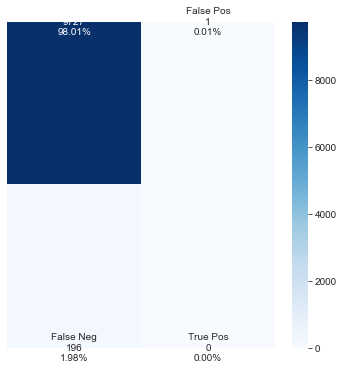

In [36]:
plt.figure(figsize=(6,6))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.grid('True')
plt.axis('off')
plt.show()

#### Accuracy Score

In [28]:
print('The accuracy of the model is :',accuracy_score(y_test,y_pred))

The accuracy of the model is : 0.9810407422347721
